<a href="https://colab.research.google.com/github/Shreeshambav/DeepLearning_training/blob/main/Deeplearning_basic_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Deep Learning
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Read the CSV file and store it in the 'dataset' variable
dataset = pd.read_csv('Churn_Modelling.csv')

# Display the first few rows of the dataset
print(dataset.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
# From the dataset we understand that what has to be done to stop customer from exiting the bank
# For further analysis we need to divide daatset into independent and dependent features
# On analysing the data ecept Eited column rest are independent features
# Following column do not add any value to analysis RowNumber  CustomerId   Surname so we go ahead and drop those columns
# Exited columns states - Customer exited or not exited a binary classification
# Geography and Gender are categorical variables or features.


In [6]:
# Selection of Columns:
# Starting from column 3 to 13
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]


In [8]:
print(X.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  


In [9]:
print(y.head())

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [16]:
# Feature engineering
# Let us fix Categorical feature using hot encoding
geography=pd.get_dummies(X['Geography'], drop_first=True)
print(geography)
gender=pd.get_dummies(X['Gender'], drop_first=True)
print(gender)



      Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]
      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]


In [27]:
# Concatenate these variables with dataframe
# First we need to drop Geography and gender column
X=X.drop(['Geography','Gender'], axis=1)

In [28]:
# Second we need concat the encoded columns with dataframe
X = pd.concat([X,geography,gender], axis=1)

In [29]:
# Now time to train the given dataset
# Splitting the dataset into Training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [30]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [31]:
print(X_train)

[[ 0.16958176 -0.46460796  0.00666099 ... -0.5698444   1.74309049
  -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 ...  1.75486502 -0.57369368
   0.91601335]
 [-1.19119591 -0.94312892 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 ...
 [ 0.9015152  -0.36890377  0.00666099 ... -0.5698444  -0.57369368
   0.91601335]
 [-0.62420521 -0.08179119  1.39076231 ... -0.5698444   1.74309049
  -1.09168714]
 [-0.28401079  0.87525072 -1.37744033 ...  1.75486502 -0.57369368
  -1.09168714]]


In [32]:
print(X_test)

[[-0.55204276 -0.36890377  1.04473698 ...  1.75486502 -0.57369368
  -1.09168714]
 [-1.31490297  0.10961719 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 [ 0.57162971  0.30102557  1.04473698 ... -0.5698444   1.74309049
  -1.09168714]
 ...
 [-0.74791227 -0.27319958 -1.37744033 ... -0.5698444   1.74309049
   0.91601335]
 [-0.00566991 -0.46460796 -0.33936434 ...  1.75486502 -0.57369368
   0.91601335]
 [-0.79945688 -0.84742473  1.04473698 ...  1.75486502 -0.57369368
   0.91601335]]


In [57]:
# Part 2: ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [58]:
# Lets intialise the ANN
classifier=Sequential()

In [59]:
# We need to add input layer since we have 11 independent column, we will have 11 input
classifier.add(Dense(units=11, activation='relu'))

In [76]:
# We need to add first hidden layer - depends
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [77]:
# We need to add Second hidden layer - depends
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [63]:
# We need to add Output layer - We want one put output exit or not exited
classifier.add(Dense(1, activation='sigmoid'))

In [64]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
# Now we need to train our neural network
# Compile the model with the correct loss and metrics
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
# How many number of epochs should be given - When accuracy becomes constant or almost same.
# We can use Early stopping - When accuracy is not increasing.
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [66]:
# Start training the model
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)



Epoch 1/1000
536/536 [==============================] - 5s 5ms/step - loss: 0.4330 - accuracy: 0.8110 - val_loss: 0.4046 - val_accuracy: 0.8205
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3738 - accuracy: 0.8421 - val_loss: 0.3973 - val_accuracy: 0.8307
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3623 - accuracy: 0.8507 - val_loss: 0.3682 - val_accuracy: 0.8478
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3570 - accuracy: 0.8541 - val_loss: 0.3789 - val_accuracy: 0.8470
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3564 - accuracy: 0.8561 - val_loss: 0.3722 - val_accuracy: 0.8440
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3504 - accuracy: 0.8563 - val_loss: 0.3811 - val_accuracy: 0.8391
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3530 - accuracy: 0.8545 - val_loss: 0.3724 - val_accuracy:

In [67]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

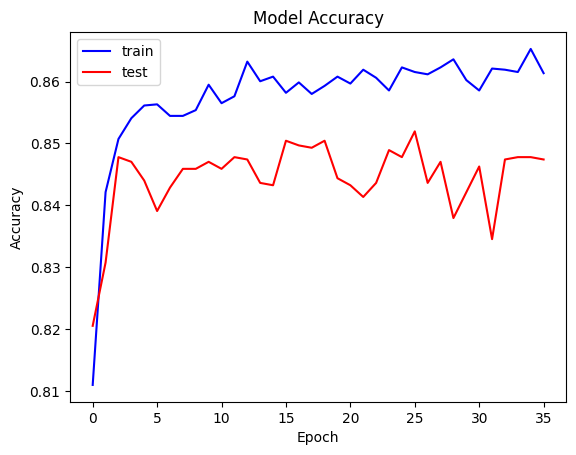

In [68]:
# Summarise history for accuracy
# Plot the data
plt.plot(model_history.history['accuracy'], color='b')
plt.plot(model_history.history['val_accuracy'], color='r')
# Add a title to the plot
plt.title('Model Accuracy')
# Set labels for x-axis and y-axis
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# Add a Legend to the plot
plt.legend(['train','test'], loc='upper left')
# Show the plot
plt.show()


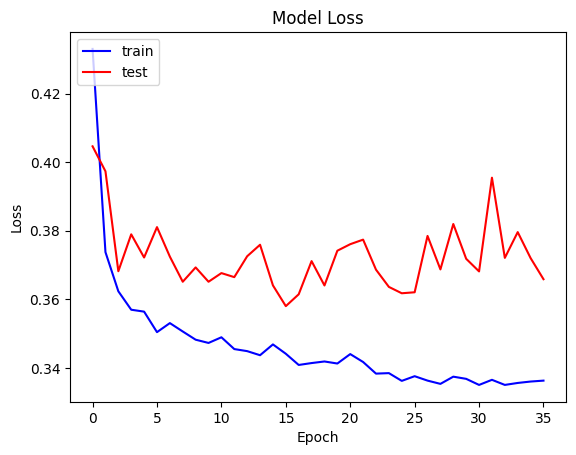

In [69]:
# Summarise history for Loss
# Plot the data
plt.plot(model_history.history['loss'], color='b')
plt.plot(model_history.history['val_loss'], color='r')
# Add a title to the plot
plt.title('Model Loss')
# Set labels for x-axis and y-axis
plt.ylabel('Loss')
plt.xlabel('Epoch')
# Add a Legend to the plot
plt.legend(['train','test'], loc='upper left')
# Show the plot
plt.show()

In [70]:
# Let us do predictions and evaluating the model
y_pred=classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [71]:
# Create a confusiom matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1511   84]
 [ 207  198]]


In [73]:
# Let us calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.8545


In [75]:
# We can get the weights used in this neural network and store in Pickle file
classifier.get_weights()

[array([[ 1.6924646e-01, -1.6189137e+00, -4.9246871e-01,  1.0917470e+00,
          4.3020430e-01,  3.6959973e-01, -1.3541549e-01, -3.8216144e-02,
          1.1223799e+00,  6.8983741e-02, -3.7640408e-01],
        [-4.0043087e+00, -3.5254147e+00, -1.9312368e-01, -4.2079911e+00,
          1.4150617e-01, -6.4598966e-01,  4.7271758e-02, -1.8720242e+00,
          5.0374162e-01,  1.4134017e+00, -2.8500865e+00],
        [-7.8970087e-01,  1.1038299e+00, -4.9635541e-01, -1.5237207e-03,
         -1.1461732e+00,  1.0126269e+00,  1.3310289e-01,  1.9138548e-01,
          3.6969116e-01, -2.4646828e-01, -7.6686966e-01],
        [-2.3329577e-01,  5.4219414e-02, -2.1764364e+00, -2.3444016e-01,
          2.1432610e+00, -3.8131914e+00,  1.0420086e+00, -3.1436172e+00,
         -9.8668587e-01,  3.4497476e-01, -5.1337880e-01],
        [ 7.5857669e-01,  3.1128845e-01, -5.1710215e+00, -8.2469052e-01,
          2.5243251e+00,  1.9796668e+00,  4.1376925e+00, -1.2391219e+00,
          2.4760399e+00, -7.2792822e-0

In [ ]:
# CNN Approach